In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import time
import math
import experiments.toy_classification as exp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
device = torch.device("cpu")

In [10]:
batch_size = 2
layers = [
    (2, 16),
    (16, 16),
    (16, 1)
]

In [4]:
from training import toy

torch.manual_seed(42)

trainset = toy.TwoMoonsDataset(samples=100, noise=0.1, seed=42)
trainloader = torch.utils.data.DataLoader(trainset, batch_size, shuffle=True)

testset = toy.TwoMoonsDataset(samples=100, noise=0.1, seed=42, extra_samples=100)

device = torch.device("cpu")

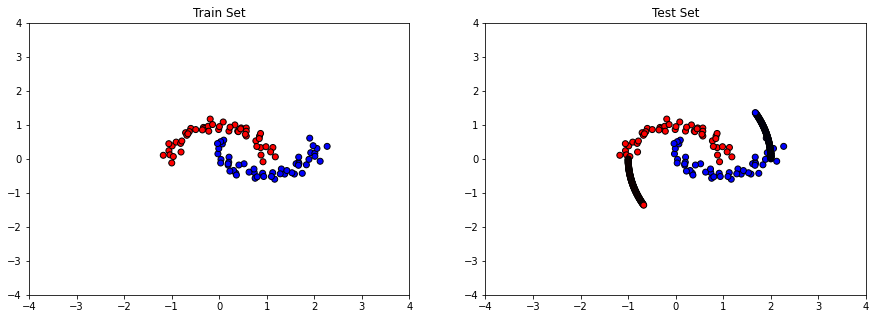

In [5]:
import matplotlib.pyplot as plt

xlim = 4
ylim = 4

fig, (train_fig, test_fig) = plt.subplots(1, 2, figsize=(15, 5))
train_fig.set_title("Train Set")
train_fig.set_xlim(-xlim, xlim)
train_fig.set_ylim(-ylim, ylim)
test_fig.set_title("Test Set")
test_fig.set_xlim(-xlim, xlim)
test_fig.set_ylim(-ylim, ylim)
trainset.plot_dataset(train_fig)
testset.plot_dataset(test_fig)

In [13]:
torch.manual_seed(42)
pp = exp.point_predictor(layers, 500, trainloader, batch_size)

Generated model: Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)
Epoch 0: loss 0.34105873107910156
Epoch 100: loss 0.11513890326023102
Epoch 200: loss 0.031730446964502335
Epoch 300: loss 0.006549667101353407
Epoch 400: loss 0.0031353188678622246
Final loss 0.0019298300612717867


In [17]:
torch.manual_seed(42)
swag = exp.swag(layers, 500, trainloader, batch_size, 5, 10)

Generated model: Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)
Epoch 0: loss 0.34105873107910156
Epoch 100: loss 0.11513890326023102
Epoch 200: loss 0.031730446964502335
Epoch 300: loss 0.006549667101353407
Epoch 400: loss 0.0031353188678622246
Final loss 0.0019298300612717867


In [18]:
torch.manual_seed(42)
ensemble = exp.ensemble(5, layers, 500, trainloader, batch_size)

Generated model: Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)
Generated model: Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)
Generated model: Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)
Generated model: Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)
Generate

In [20]:
torch.manual_seed(42)
mc_dropout = exp.mc_droupout(0.1, layers, 500, trainloader, batch_size)

Generated model: Sequential(
  (0): Linear(in_features=2, out_features=17, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=17, out_features=17, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.1, inplace=False)
  (6): Linear(in_features=17, out_features=1, bias=True)
  (7): Sigmoid()
)
Epoch 0: loss 0.3528083860874176
Epoch 100: loss 0.11021067947149277
Epoch 200: loss 0.05171416699886322
Epoch 300: loss 0.018527144566178322
Epoch 400: loss 0.012747854925692081
Final loss 0.004974991083145142


In [22]:
torch.manual_seed(42)
from training.bbb import GaussianPrior, MixturePrior
prior = GaussianPrior(0, 1)
bbb = exp.bbb(prior, 5, "activations", layers, 500, trainloader, batch_size, device)

Generated model: Sequential(
  (0): BBBLinear()
  (1): ReLU()
  (2): BBBLinear()
  (3): ReLU()
  (4): BBBLinear()
  (5): Sigmoid()
)
Epoch 0: loss 8.858044624328613
Epoch 100: loss 5.6357245445251465
Epoch 200: loss 3.0317907333374023
Epoch 300: loss 1.3899749517440796
Epoch 400: loss 0.5928549766540527
Final loss 0.3809807598590851


In [29]:
torch.manual_seed(42)
intel_config = {
        "prior_mu": 0.0,
        "prior_sigma": 1.0,
        "posterior_mu_init": 0.0,
        "posterior_rho_init": -3.0,
        "type": "Reparameterization",
        "moped_enable": False,
        "moped_delta": 0.5,
}
bbb_intel = exp.bbb_intel(intel_config, layers, 500, trainloader, batch_size)

Generated model: Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)
Epoch 0: loss 3.7850186824798584
Epoch 100: loss 0.4650314450263977
Epoch 200: loss 0.38969218730926514
Epoch 300: loss 0.4428802728652954
Epoch 400: loss 0.38490164279937744
Final loss 0.42712631821632385


C:\Users\flose\.conda\envs\ml\lib\site-packages\matplotlib\contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\flose\.conda\envs\ml\lib\site-packages\matplotlib\contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


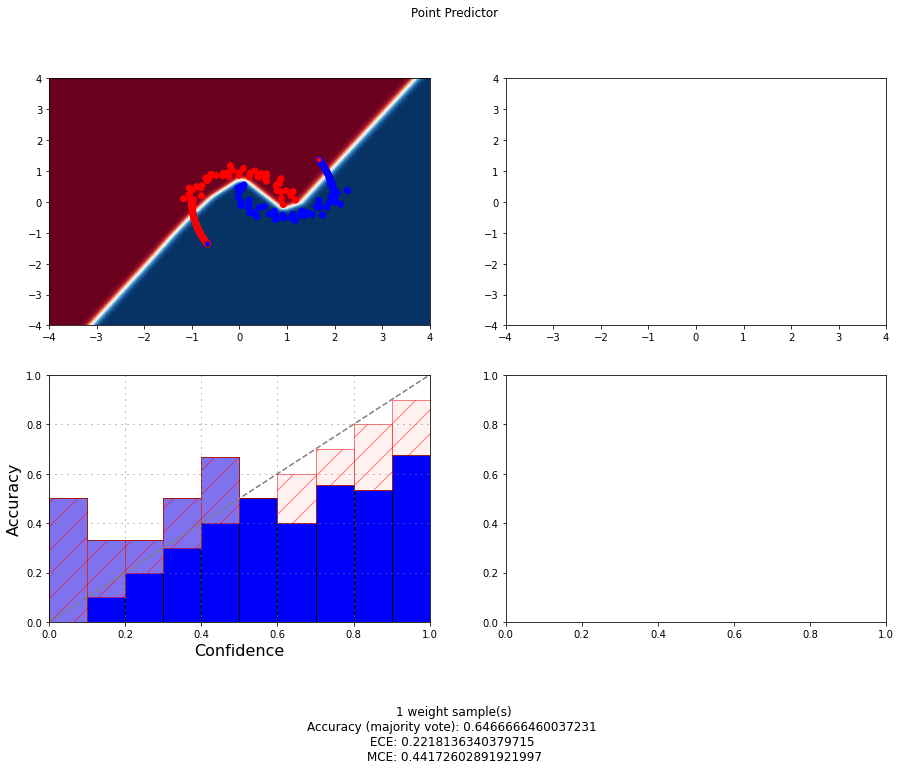

In [33]:
testset.plot("Point Predictor", pp, 1, 4, 4)

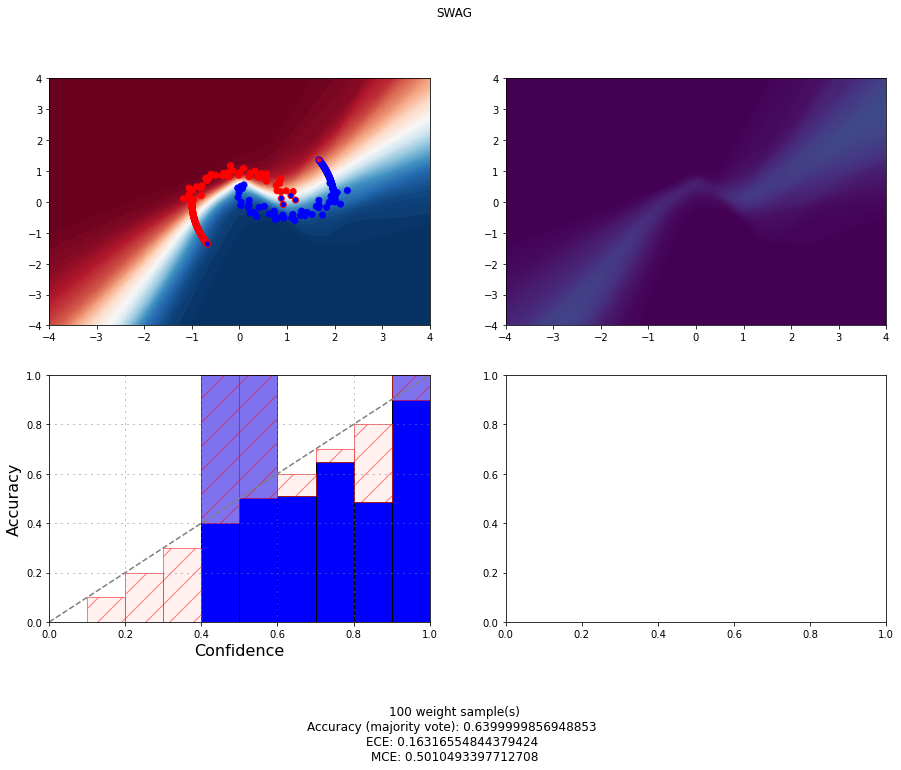

In [34]:
testset.plot("SWAG", swag, 100, 4, 4)

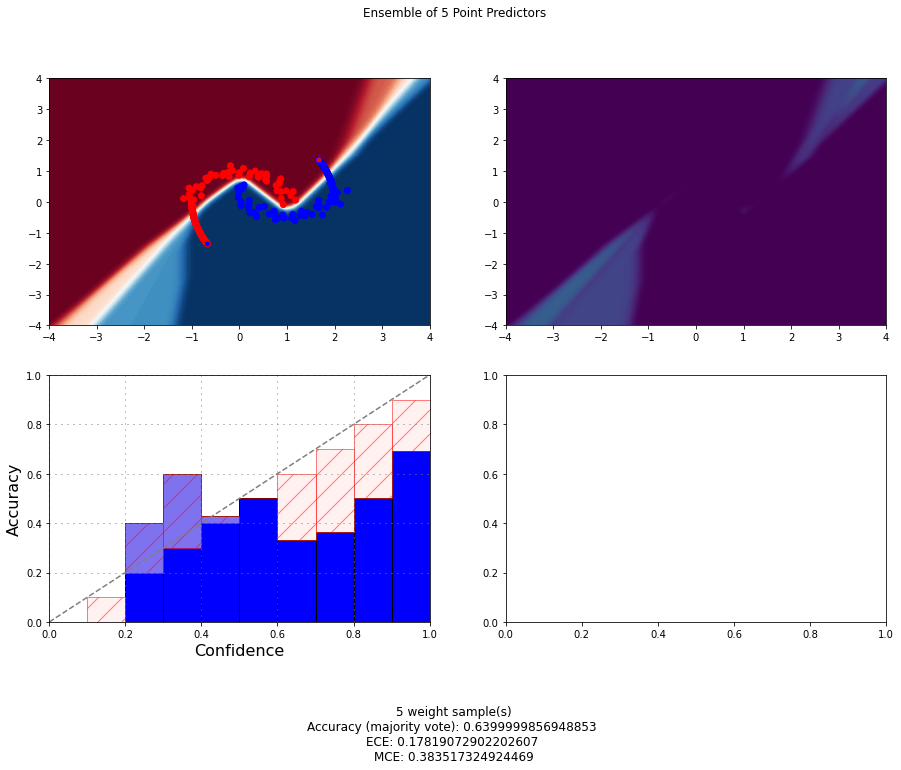

In [35]:
testset.plot("Ensemble of 5 Point Predictors", ensemble, 5, 4, 4)

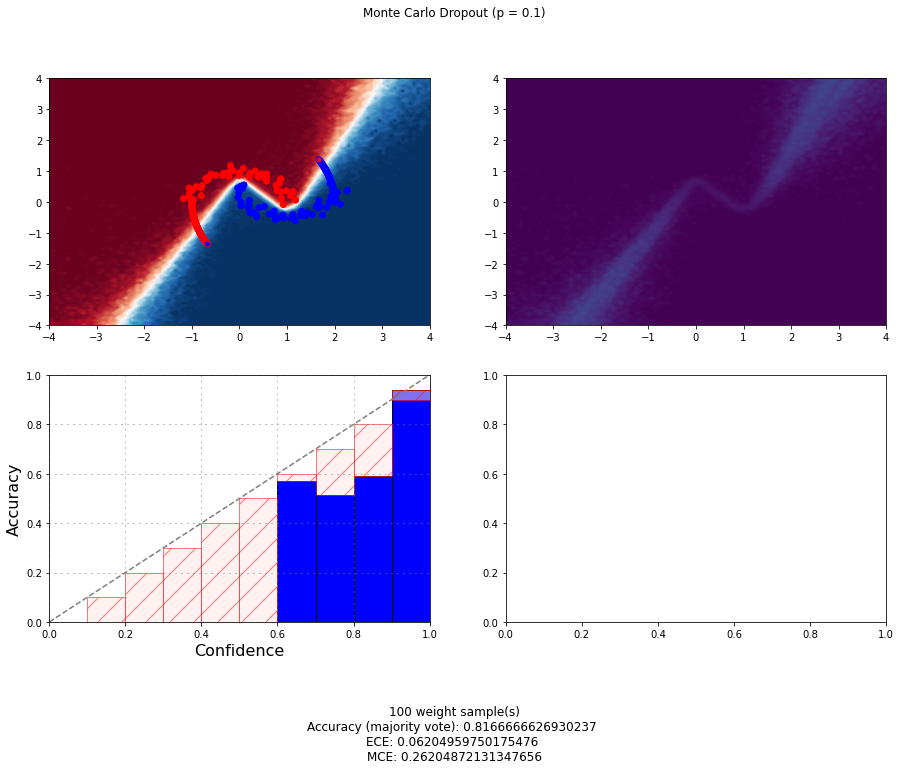

In [36]:
testset.plot("Monte Carlo Dropout (p = 0.1)", mc_dropout, 100, 4, 4)

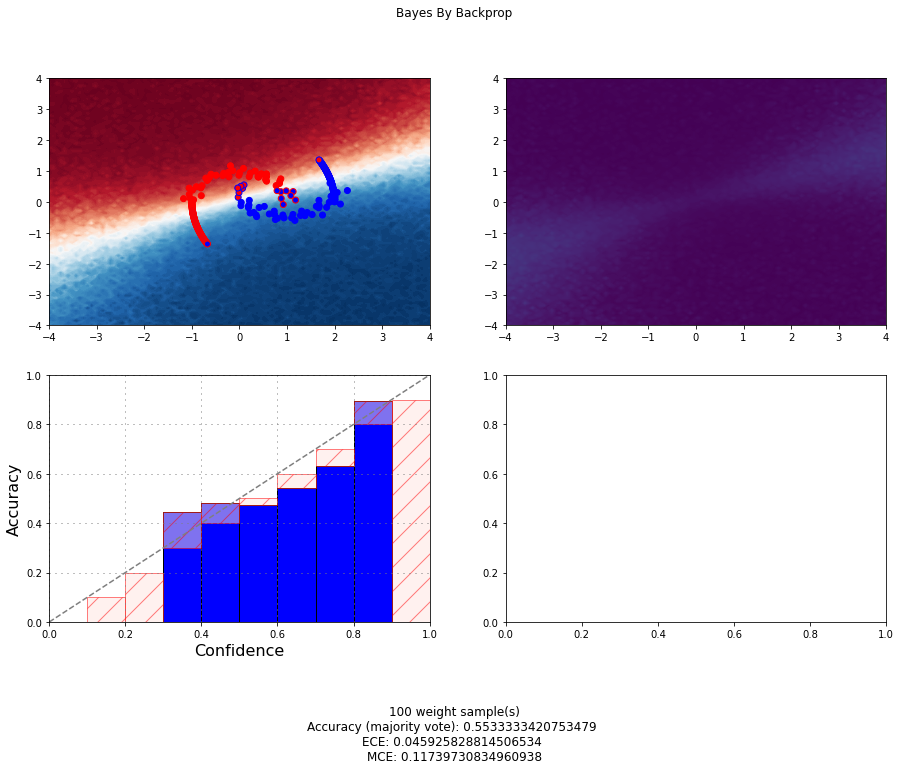

In [37]:
testset.plot("Bayes By Backprop", bbb, 100, 4, 4)

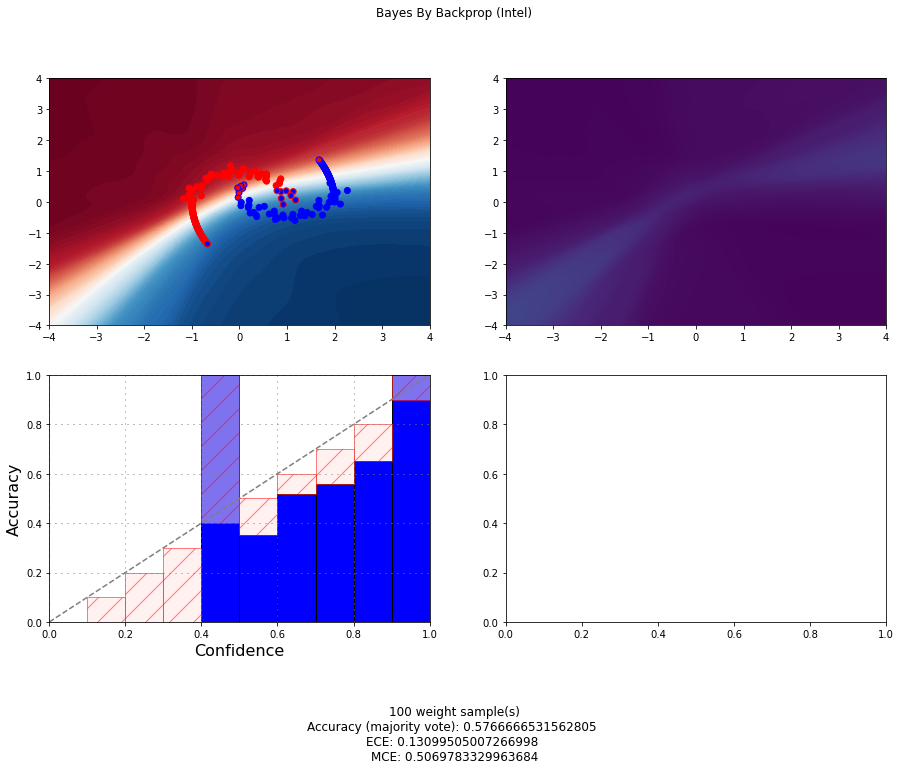

In [38]:
testset.plot("Bayes By Backprop (Intel)", bbb_intel, 100, 4, 4)